# 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

## y: Kospi 200

In [2]:
kospi = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/final.csv")

In [3]:
# Date를 datetime 형태로 변경
kospi['Date'] = pd.to_datetime(kospi['Date'])

In [4]:
# Close값을 사용하여 변동성을 구하고, Fluctuation 컬럼으로 생성
kospi['Fluctuation'] = kospi['Close'].pct_change()

In [5]:
# 변동성 절댓값(abs()) 씌우기
kospi['Fluctuation'] = (kospi['Fluctuation']).abs()

In [6]:
y = kospi.set_index('Date')  # 월 평균을 구하기 위해 Date를 인텍스로 설정
y = y['Fluctuation'].resample('1m').mean()  # 월 평균 변동성
y = y * 100  # 숫자가 너무 작아서 100 곱해주기

## X1: 두바이유

In [7]:
oil = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/두바이유.csv")

In [8]:
# 날짜를 datetime 형태로 변경
oil['날짜'] = pd.to_datetime(oil['날짜'])

In [9]:
# 날짜, 종가만 뽑아오기
oil = oil[['날짜', '종가']]

In [10]:
# 날짜 기준으로 과거(2011->2022)부터 정렬
oil = oil.sort_values(by = '날짜', ascending=True).reset_index(drop=True)

In [11]:
X_oil = oil.set_index('날짜')
X_oil = X_oil['종가'].resample('1m').mean()   # 월 평균 유가
X_oil = X_oil.reset_index()

In [12]:
# 두바이유가로 컬럼명 변경
X_oil = X_oil.rename(columns={'날짜':'Date', '종가':'두바이유가'})

## X2: 금 선물

In [13]:
gold = pd.read_csv("C:/Users/82105/Desktop/hello/Data/금 선물.csv")

In [14]:
# 종가의 천단위를 표시하는 , 삭제
# float으로 변환 (문자형->숫자형)
gold['종가'] = gold['종가'].str.replace(',', '').astype('float')

In [15]:
gold['날짜'] = pd.to_datetime(gold['날짜'])

In [16]:
gold = gold[['날짜', '종가']]

In [17]:
gold = gold.sort_values(by = '날짜', ascending=True).reset_index(drop=True)

In [18]:
X_gold = gold.set_index('날짜')
X_gold = X_gold['종가'].resample('1m').mean()   # 월 평균 유가
X_gold = X_gold.reset_index()

In [19]:
X_gold = X_gold.rename(columns={'날짜':'Date', '종가':'금값'})

## X3: 한국 GDP

In [20]:
gdp = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/GDP_transform.csv", encoding='cp949')

In [21]:
X_gdp = gdp

In [22]:
X_gdp['Date'] = pd.to_datetime(X_gdp['Date'])

## X4: 한국 생산자물가지수

In [23]:
producer = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/한국 생산자물가지수_날짜변경.csv", encoding='cp949')

In [24]:
producer['Date'] = pd.to_datetime(producer['Date'])

In [25]:
producer = producer.sort_values(by='Date', ascending=True).reset_index(drop=True)

In [26]:
X_prod = producer.rename(columns={'실제':'생산자물가지수'})

## X5: 한국 소비자물가지수

In [27]:
consumer = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/한국 소비자물가지수_날짜변경.csv", encoding='cp949')

In [28]:
consumer = consumer.rename(columns={'Consumer':'소비자물가지수'})

In [29]:
X_consumer = consumer
X_consumer['Date'] = pd.to_datetime(X_consumer['Date'])

## X6: 한국 임금상승률

In [30]:
wage = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/한국 임금상승률_수정.csv")

In [31]:
X_wage = wage
X_wage['Date'] = pd.to_datetime(X_wage['Date'])

## X7: 한국 통화공급량

In [32]:
money = pd.read_csv("C:/Users/82105/Desktop/hello/Data/Kospi/한국 통화공급량_수정.csv")

In [33]:
X_money = money

In [34]:
X_money = X_money.rename(columns={'실제':'통화공급량'})
X_money['Date'] = pd.to_datetime(X_money['Date'])

## X8: 한미 시장금리

In [35]:
interest_rate = pd.read_csv("C:/Users/82105/Desktop/hello/Data/한미 시장금리.csv", encoding='cp949')

In [36]:
X_interest_rate = interest_rate
X_interest_rate['Date'] = pd.to_datetime(X_interest_rate['Date'])

## X9: 환율

In [37]:
exchange_rate = pd.read_csv("C:/Users/82105/Desktop/hello/Data/환율.csv", encoding='cp949')

In [38]:
exchange_rate['기준환율'] = exchange_rate['기준환율'].str.replace(',','')
exchange_rate['기준환율'] = exchange_rate['기준환율'].astype('float')

In [39]:
exchange_rate['일자'] = pd.to_datetime(exchange_rate['일자'])

In [40]:
X_exchange_rate = exchange_rate.set_index('일자')
X_exchange_rate = X_exchange_rate['기준환율'].resample('1m').mean()  # 월 평균 환율
X_exchange_rate = X_exchange_rate.reset_index()
X_exchange_rate = X_exchange_rate.rename(columns={'일자':'Date'})

# 데이터 merge

In [41]:
X = pd.merge(X_gold, X_oil, how='outer', on='Date')
X = pd.merge(X, X_gdp, how='outer', on='Date')
X = pd.merge(X, X_prod, how='outer', on='Date')
X = pd.merge(X, X_consumer, how='outer', on='Date')
X = pd.merge(X, X_wage, how='outer', on='Date')
X = pd.merge(X, X_money, how='outer', on='Date')
X = pd.merge(X, X_interest_rate, how='outer', on='Date')
X = pd.merge(X, X_exchange_rate, how='outer', on='Date')

In [42]:
X

,Date,금값,두바이유가,GDP,생산자물가지수,소비자물가지수,월평균 임금,통화공급량,한국_시장금리,미국_시장금리,기준환율
0,2011-01-31,1362.238095,NaN,328096.000,5.70%,88.288,2487339.0,7.20%,3.09,0.1,1120.071429
1,2011-02-28,1375.715000,NaN,NaN,6.80%,88.892,NaN,6.80%,NaN,NaN,1118.141176
2,2011-03-31,1422.939130,NaN,NaN,7.40%,89.238,NaN,6.80%,NaN,NaN,1122.445455
3,2011-04-30,1482.500000,NaN,343678.800,8.20%,89.325,NaN,6.60%,NaN,NaN,1086.838095
4,2011-05-31,1512.477273,NaN,NaN,8.10%,89.497,NaN,6.60%,NaN,NaN,1083.535000
...,...,...,...,...,...,...,...,...,...,...,...
139,2022-08-31,1778.647826,96.057391,NaN,9.20%,108.620,NaN,7.50%,NaN,NaN,1318.440909
140,2022-09-30,1692.076087,91.751905,NaN,8.40%,108.930,NaN,7.10%,NaN,NaN,1391.590000
141,2022-10-31,1672.738095,91.476190,544119.282,8.00%,109.210,NaN,6.80%,NaN,NaN,1426.657895
142,2022-11-30,1731.109091,88.780476,NaN,7.30%,109.100,NaN,6.70%,NaN,NaN,1364.100000


# 최종 df

In [43]:
X.to_csv("C:/Users/82105/Desktop/hello/Data/Kospi/Kospi 다중선형회귀 df.csv", encoding='utf-8-sig')

# 다중선형회귀

In [44]:
df = pd.read_csv('C:/Users/82105/Desktop/hello/Data/Kospi/Kospi 다중선형회귀 df.csv')

In [45]:
# Unnamed 컬럼 삭제
df = df.iloc[:, 1:]

In [46]:
# 데이터에 %가 붙은 컬럼들을 float 형태로 바꿔주기
# 5.6% -> 5.6 = 문자열 -> 숫자형
df['생산자물가지수'] = df['생산자물가지수'].str.replace('%', '').astype('float')
df['통화공급량'] = df['통화공급량'].str.replace('%', '').astype('float')

In [47]:
df.columns

Index(['Date', '금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율'],
      dtype='object')

# NaN값 채우기: KNNImputer()

In [48]:
from sklearn.impute import KNNImputer

In [49]:
# Date 컬럼을 뺀 실제 X들만 가져오기
df1 = df[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']]

In [50]:
df1

,금값,두바이유가,GDP,생산자물가지수,소비자물가지수,월평균 임금,통화공급량,한국_시장금리,미국_시장금리,기준환율
0,1362.238095,NaN,328096.000,5.7,88.288,2487339.0,7.2,3.09,0.1,1120.071429
1,1375.715000,NaN,NaN,6.8,88.892,NaN,6.8,NaN,NaN,1118.141176
2,1422.939130,NaN,NaN,7.4,89.238,NaN,6.8,NaN,NaN,1122.445455
3,1482.500000,NaN,343678.800,8.2,89.325,NaN,6.6,NaN,NaN,1086.838095
4,1512.477273,NaN,NaN,8.1,89.497,NaN,6.6,NaN,NaN,1083.535000
...,...,...,...,...,...,...,...,...,...,...
139,1778.647826,96.057391,NaN,9.2,108.620,NaN,7.5,NaN,NaN,1318.440909
140,1692.076087,91.751905,NaN,8.4,108.930,NaN,7.1,NaN,NaN,1391.590000
141,1672.738095,91.476190,544119.282,8.0,109.210,NaN,6.8,NaN,NaN,1426.657895
142,1731.109091,88.780476,NaN,7.3,109.100,NaN,6.7,NaN,NaN,1364.100000


In [51]:
imputer = KNNImputer()
df1[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']] = imputer.fit_transform(df1[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']])

C:\Users\82105\AppData\Local\Temp\ipykernel_18640\3124686596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   금값       144 non-null    float64
 1   두바이유가    144 non-null    float64
 2   GDP      144 non-null    float64
 3   생산자물가지수  144 non-null    float64
 4   소비자물가지수  144 non-null    float64
 5   월평균 임금   144 non-null    float64
 6   통화공급량    144 non-null    float64
 7   한국_시장금리  144 non-null    float64
 8   미국_시장금리  144 non-null    float64
 9   기준환율     144 non-null    float64
dtypes: float64(10)
memory usage: 11.4 KB


In [53]:
df1  # NaN값 채워진 거 확인하기

,금값,두바이유가,GDP,생산자물가지수,소비자물가지수,월평균 임금,통화공급량,한국_시장금리,미국_시장금리,기준환율
0,1362.238095,53.110665,328096.0000,5.7,88.288,2487339.0,7.2,3.090,0.100,1120.071429
1,1375.715000,49.183402,435680.2400,6.8,88.892,2983383.6,6.8,2.038,0.862,1118.141176
2,1422.939130,58.312067,394624.1400,7.4,89.238,3105172.4,6.8,1.710,0.920,1122.445455
3,1482.500000,57.345793,343678.8000,8.2,89.325,2721724.4,6.6,2.550,0.114,1086.838095
4,1512.477273,61.969665,377736.4400,8.1,89.497,2910132.2,6.6,2.196,0.512,1083.535000
...,...,...,...,...,...,...,...,...,...,...
139,1778.647826,96.057391,514606.4800,9.2,108.620,3220586.6,7.5,2.014,0.162,1318.440909
140,1692.076087,91.751905,524162.2764,8.4,108.930,3220586.6,7.1,2.014,0.162,1391.590000
141,1672.738095,91.476190,544119.2820,8.0,109.210,3482245.8,6.8,1.136,1.090,1426.657895
142,1731.109091,88.780476,524162.2764,7.3,109.100,3220586.6,6.7,2.014,0.162,1364.100000


## train, validation 데이터 나누기

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_val, y_train, y_val = train_test_split(df1, y, random_state=42, test_size=0.2)

## Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']] = scaler.transform(X_train[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']])
X_val[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']] = scaler.transform(X_val[['금값', '두바이유가', 'GDP', '생산자물가지수', '소비자물가지수', '월평균 임금', '통화공급량',
       '한국_시장금리', '미국_시장금리', '기준환율']])

## 다중선형회귀  
X1~X10이 y에게 영향을 끼치는 정도

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear = LinearRegression()

In [60]:
# 학습
linear.fit(X_train, y_train)

LinearRegression()

In [61]:
# 예측
train_pred = linear.predict(X_train)
valid_pred = linear.predict(X_val)

In [62]:
# 결정 계수
from sklearn.metrics import r2_score

In [63]:
print(r2_score(y_train, train_pred))
print(r2_score(y_val, valid_pred))

0.46016816237265623
0.09792888168174385


In [64]:
# X1~X10이 y에게 영향을 끼치는 정도
result_dic = {column:coef for column, coef in zip(df1.columns, linear.coef_)}

In [65]:
result_dic

{'금값': 0.16111754972922773,
 '두바이유가': -0.027399676177071293,
 'GDP': 0.13220773308088538,
 '생산자물가지수': 0.022286988620588095,
 '소비자물가지수': -0.17961874578729592,
 '월평균 임금': 0.00023987282349464484,
 '통화공급량': -0.09418015173934993,
 '한국_시장금리': -0.06277751508465311,
 '미국_시장금리': -0.08542919821092976,
 '기준환율': 0.049121550121824877}

# XGBoost  
모델을 예측할 때 X1~X10이 사용된 빈도/정도

In [66]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [67]:
modelXGB = XGBRegressor()

In [68]:
modelXGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
# 예측
train_pred = modelXGB.predict(X_train)
valid_pred = modelXGB.predict(X_val)

In [70]:
print(r2_score(y_train, train_pred))
print(r2_score(y_val, valid_pred))

# 과적합 ㅠ

0.9999904923997674
0.34094023988488376


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

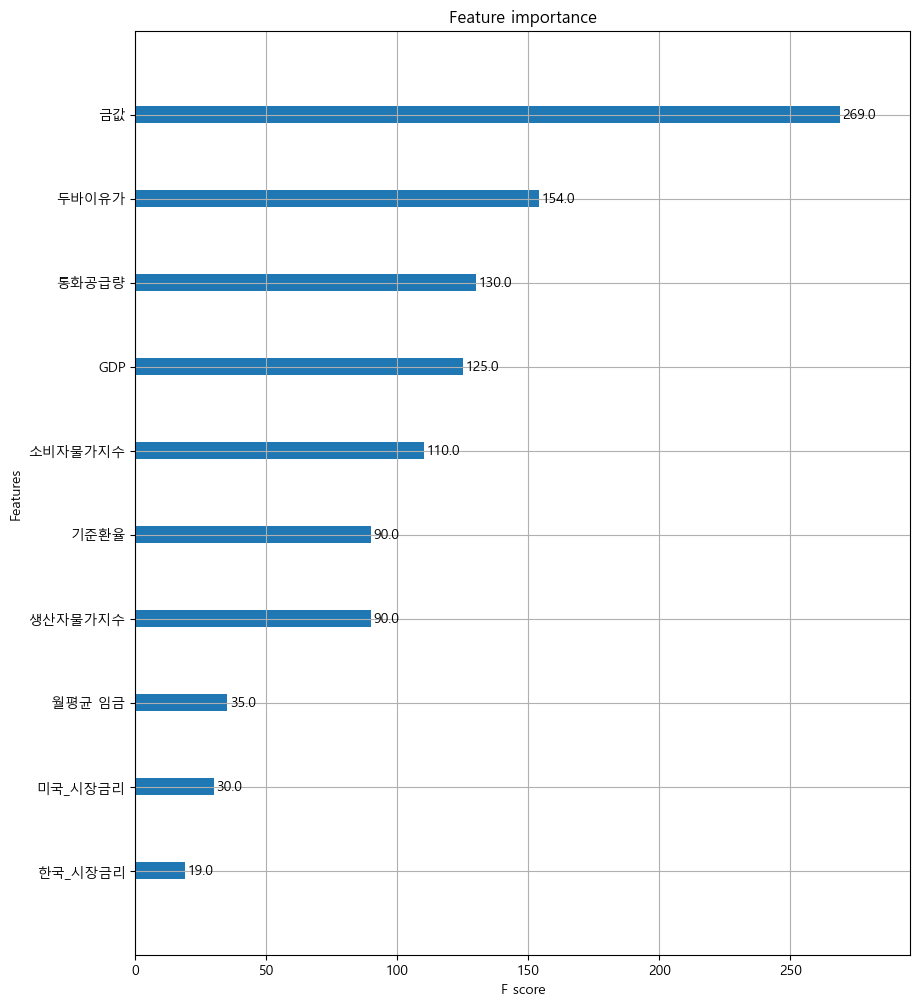

In [71]:
# 모델을 예측할 때 X1~X10이 사용된 빈도/정도
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(modelXGB, ax=ax)

# SHAP value

In [72]:
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

In [73]:
explainer1 = shap.Explainer(modelXGB, X_val)
shap_values1 = explainer1(X_val)

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


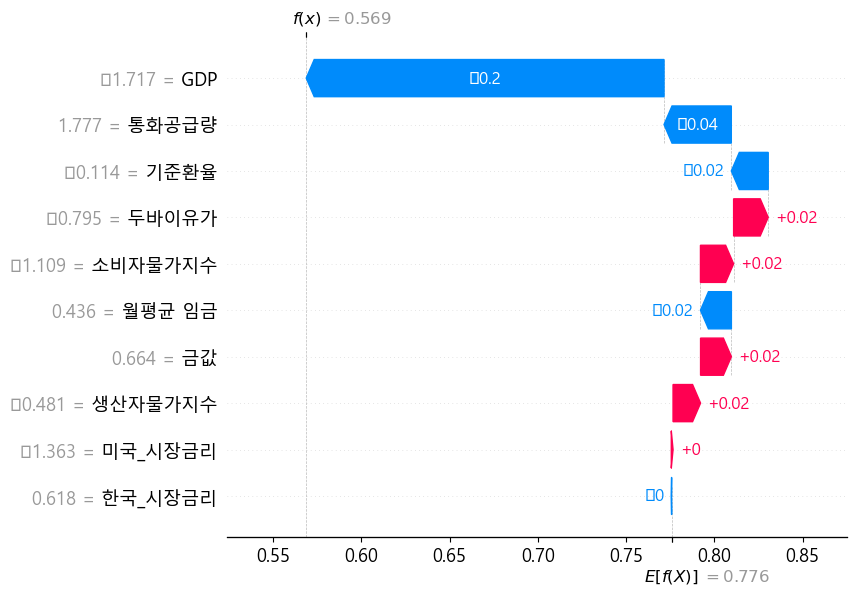

In [74]:
shap.plots.waterfall(shap_values1[1])

다중 선형 회귀, SHAP Value의 결과를 볼 때 음수라고 안좋은 게 아니라 음의 양만큼 변동성에 영향을 끼친다고 보면 된다.  
XGBoost는 빈도수이기 때문에 음수가 없다.